In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tempfile
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from PIL import Image
from IPython.display import Image as IPImage, display
import matplotlib.animation as animation
import matplotlib.patches as patches

"""    
def update_plot(frame, angles, distance_to_sun, orbit_line, satellite, fig, ax, canvas):
    actual_frame = frame % len(angles)
    angle = angles[actual_frame]
    x, y = distance_to_sun * np.cos(angle), distance_to_sun * np.sin(angle)
    satellite.set_data([x], [y])
    orbit_line.set_data(distance_to_sun * np.cos(angles[:actual_frame+1]), distance_to_sun * np.sin(angles[:actual_frame+1]))
    ax.draw_artist(ax.patch)
    ax.draw_artist(orbit_line)
    ax.draw_artist(satellite)
    fig.canvas.flush_events()
    canvas.draw()
    image = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return Image.fromarray(image)

def plot_animation(distance_to_sun, orbital_speed, num_frames, repeat_count=1):
    angles = simulate_orbit(distance_to_sun, orbital_speed, num_frames)

    fig, ax = plt.subplots(figsize=(4,4))
    ax.set_aspect('equal')
    ax.set_xlim(-distance_to_sun*2, distance_to_sun*2)
    ax.set_ylim(-distance_to_sun*2, distance_to_sun*2)
    orbit_line, = ax.plot([], [], 'b', lw=1)
    satellite, = ax.plot([], [], 'ro')
    canvas = FigureCanvas(fig)

    images = [update_plot(frame, angles, distance_to_sun, orbit_line, satellite, fig, ax, canvas) for frame in range(num_frames)]

    with tempfile.NamedTemporaryFile(suffix=".gif", delete=False) as tmpfile:
        gif_path = tmpfile.name
        images[0].save(gif_path, save_all=True, append_images=images[1:], loop=repeat_count-1, duration=30)
        display(IPImage(gif_path))

    plt.close()
"""

'    \ndef update_plot(frame, angles, distance_to_sun, orbit_line, satellite, fig, ax, canvas):\n    actual_frame = frame % len(angles)\n    angle = angles[actual_frame]\n    x, y = distance_to_sun * np.cos(angle), distance_to_sun * np.sin(angle)\n    satellite.set_data([x], [y])\n    orbit_line.set_data(distance_to_sun * np.cos(angles[:actual_frame+1]), distance_to_sun * np.sin(angles[:actual_frame+1]))\n    ax.draw_artist(ax.patch)\n    ax.draw_artist(orbit_line)\n    ax.draw_artist(satellite)\n    fig.canvas.flush_events()\n    canvas.draw()\n    image = np.frombuffer(canvas.tostring_rgb(), dtype=\'uint8\')\n    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))\n    return Image.fromarray(image)\n\ndef plot_animation(distance_to_sun, orbital_speed, num_frames, repeat_count=1):\n    angles = simulate_orbit(distance_to_sun, orbital_speed, num_frames)\n\n    fig, ax = plt.subplots(figsize=(4,4))\n    ax.set_aspect(\'equal\')\n    ax.set_xlim(-distance_to_sun*2, distance

In [8]:
AU = 1.496e+11

In [15]:
def simulate_orbit(dist_sun, orb_speed, num_frames=100):
    """
    Simulates a sun-synchronous orbit.
    :param dist_sun: Distance from the sun
    :param orb_speed: Speed of the orbit in meters per second.
    :return: Array of angles (in radians) representing the position of the solar cell relative to the sun over one orbit.
    """

    orbit_circum = 2 * np.pi * dist_sun
    orbit_period = orbit_circum / orb_speed

    # Generating angles for one complete orbit
    time_steps = np.linspace(0, orbit_period, num_frames)
    angles = (2 * np.pi / orbit_period) * time_steps

    return angles

def plot_orbit(angles, dist_sun):
    """
    :param angles: Array of angles (in radians).
    :param distance_to_sun: Distance from the sun in meters.
    """
    x = dist_sun * np.cos(angles) / AU
    y = dist_sun * np.sin(angles) / AU
    
    plt.figure(figsize=(3,3))
    plt.plot(x, y, label="Orbit Path")
    plt.scatter([0], [0], color='red', label="Sun")
    plt.xlabel('Distance (AU)')
    plt.ylabel('Distance (AU)')
    plt.title('Sun-Synchronous Orbit')
    plt.legend(loc=1)
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
def update_plot(frame, angles, dist_sun, orbit_line, sat, sat_flag, sun, fig, ax):
    actual_frame = frame % len(angles)
    angle = angles[actual_frame]
    x, y = dist_sun * np.cos(angle), dist_sun * np.sin(angle)

    # Update satellite position
    sat.radius = 0.1
    sat.center = (x / AU, y / AU)
    
    # Position the flag to point towards the Sun
    flag_end_x = x / AU
    flag_end_y = y / AU
    flag_start_x = flag_end_x - 0.5 * np.cos(angle)  # Flag length
    flag_start_y = flag_end_y - 0.5 * np.sin(angle)
    sat_flag.set_positions((flag_start_x, flag_start_y), (flag_end_x, flag_end_y))

    # Update orbit path
    orbit_line.set_data(dist_sun * np.cos(angles[:actual_frame+1]) / AU, dist_sun * np.sin(angles[:actual_frame+1]) / AU)
    
    return [orbit_line, sat, sat_flag, sun]

# Adjust the plot_animation function to add the Sun
def plot_animation(dist_sun, orb_speed, num_frames, repeat_count=1):
    angles = simulate_orbit(dist_sun, orb_speed, num_frames)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_aspect('equal')
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_xlabel('Distance (AU)')
    ax.set_ylabel('Distance (AU)')


    # Create orbit path
    orbit_line, = ax.plot([], [], 'b', lw=1)
    
    # Add the Sun at the center
    sun = patches.Circle((0, 0), 0.1, color='red', label='sun')
    ax.add_patch(sun)
    
    # Create a larger satellite as a circle
    sat = patches.Circle((0, 0), 0.1, color='green', label='satellite')  # Updated size
    ax.add_patch(sat)
    
    # Create a 'flag' line on the satellite to indicate rotation, pointing towards the Sun
    sat_flag = patches.FancyArrowPatch((0, 0), (0.2, 0), color='black', arrowstyle='<-, head_width=5, head_length=5')#, mutation_scale=20)
    ax.add_patch(sat_flag)
    ax.legend(loc=1)
    # Create the animation
    ani = animation.FuncAnimation(fig, update_plot, frames=range(num_frames), fargs=(angles, dist_sun, orbit_line, sat, sat_flag, sun, fig, ax), repeat=repeat_count)
    
    # Save the animation as GIF
    with tempfile.NamedTemporaryFile(suffix=".gif", delete=False) as tmpfile:
        ani.save(tmpfile.name, writer='pillow', fps=20)
        plt.close(fig)  # Close the figure to prevent it from displaying statically
        return tmpfile.name  # Return the path to the GIF file for display

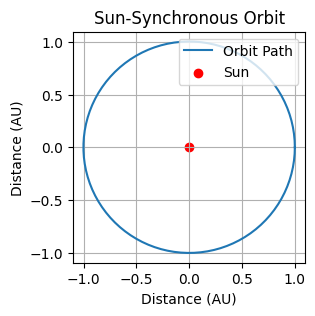

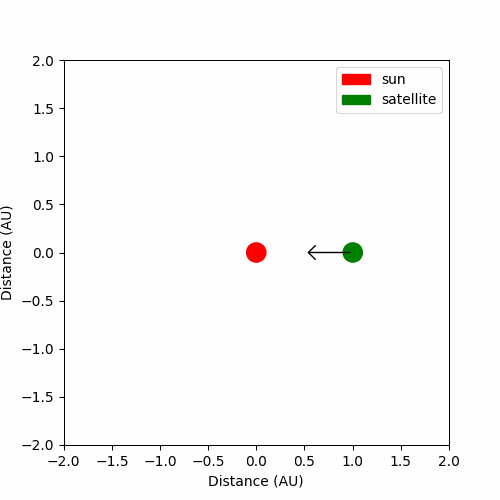

In [16]:

AU = 1.496e+11  # Astronomical Unit in meters
dist_sun = 1.5e11  # 예시 거리 (단위: 미터)
orb_speed = 30000
num_frames = 50

    
angles = simulate_orbit(dist_sun, orb_speed)
plot_orbit(angles,dist_sun)

# Generate and display the animation
gif_path = plot_animation(dist_sun, orb_speed, num_frames, 1)

# Display the GIF
IPImage(filename=gif_path)